# PN6 - Clustering

In [35]:
#K-means and DBSCAN clustering template
%matplotlib inline
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Data sourced from Inside Airbnb (http://insideairbnb.com/get-the-data.html)
# A million thanks to Murray Cox
# Pre-processed with dimensionality reduction
abnb = pd.read_csv("abnb_listings_rdcd.csv")
del abnb["Unnamed: 0"]
abnb.rename(columns={'review_scores_rating': 'rating'}, inplace=True)

In [36]:
abnb.head()

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month
0,1162609,37.785217,-122.488655,11.875956,Lovely One Bedroom Apartment This is a big wel...,-1.319244,386.666667,1,89,0.28
1,6938818,37.781505,-122.504754,11.875956,Best Secret in Town Convenience is the key for...,-1.416978,142.333333,1,92,2.33
2,4781448,37.781797,-122.492492,11.875955,3 Bd 2.5 Ba Full Flat Condo w Views Our family...,5.781405,940.000000,1,100,0.36
3,1931937,37.781564,-122.494424,11.875955,Blocks from GG Park & Ocean Beach Large 2BD ap...,-1.404158,136.666667,1,94,1.13
4,2134100,37.783888,-122.508557,11.875958,Ocean Beach hilltop cottage Newly built cottag...,-1.582193,178.333333,1,92,6.09


In [37]:
X = abnb.drop(['id', 'description'], 1)
y = abnb['description']

In [38]:
# K-means with 3 clusters
from sklearn.cluster import KMeans

# Initial k-means to 3 clusters, and fit it
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [39]:
# review cluster labels
km.labels_

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [40]:
abnb['cluster'] = km.labels_
abnb.sort_values(by='cluster')

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month,cluster
5027,2980184,37.751736,-122.477234,4.875940,At Home in the Sunset Step back into the 1950'...,3.660022,5266.666667,1,80.000000,0.15,0
67,2407150,37.759339,-122.450277,-7.124058,Modern Apt in Cole Valley Recently remodeled 1...,-1.319244,10026.666667,0,100.000000,0.25,0
3513,2071395,37.773275,-122.406175,12.875941,Ate Ate Ate Stage The Companion Team is home! ...,10.280491,9000.000000,1,100.000000,0.04,0
4356,980397,37.734945,-122.418970,-17.124072,3 bedroom plus awesome yoga studio Spacious pl...,3.526937,491.666667,0,93.000000,1.25,1
1505,7229467,37.794121,-122.401911,-10.124047,Prime Welcome to my sister's stunning 2 bed/2 ...,1.657091,510.000000,1,100.000000,1.61,1
4348,7092207,37.744550,-122.420834,-17.124067,3 Bedroom Apartment in Mission This bedroom wi...,3.589821,1200.000000,1,100.000000,0.38,1
1509,5944989,37.787269,-122.403347,-10.124050,Ritz-Carlton Club San Francisco 2BR Right in t...,3.389757,825.000000,1,100.000000,0.75,1
3023,902453,37.794119,-122.433462,5.875955,Luxury Pacific Heights Penthouse Pacific Heigh...,2.491982,740.000000,1,94.000000,1.53,1
1511,5945812,37.787298,-122.402701,-10.124050,Ritz Carlton Club San Francisco 1BR Right in t...,0.872340,675.000000,1,100.000000,0.15,1
1522,666434,37.790157,-122.406218,-10.124049,San Francisco one bedroom unit one bedroom uni...,0.805631,600.000000,1,95.000000,0.10,1


In [41]:
# review cluster centers.
km.cluster_centers_

array([[  3.77614502e+01,  -1.22444562e+02,   3.54260747e+00,
          4.20708951e+00,   8.09777778e+03,   6.66666667e-01,
          9.33333333e+01,   1.46666667e-01],
       [  3.77715087e+01,  -1.22429292e+02,   2.61047132e-01,
          3.33633463e+00,   7.27625145e+02,   1.24405705e+00,
          9.53900307e+01,   1.20366086e+00],
       [  3.77666358e+01,  -1.22430827e+02,  -2.14320622e-01,
         -3.82337260e-01,   2.13916650e+02,   1.18388307e+00,
          9.35773651e+01,   1.94749358e+00]])

In [42]:
# calculate mean of each feature for each cluster
abnb.groupby('cluster').mean()

,id,latitude,longitude,location,space,price,host,rating,reviews_per_month
cluster,,,,,,,,,
0,2486243,37.761450,-122.444562,3.542607,4.207090,8097.777778,0.666667,93.333333,0.146667
1,3600016,37.771509,-122.429292,0.261047,3.336335,727.625145,1.244057,95.390031,1.203661
2,4132471,37.766636,-122.430827,-0.214321,-0.382337,213.916650,1.183883,93.577365,1.947494


In [43]:
# save the DataFrame above of cluster centers
centers = abnb.groupby('cluster').mean()

In [45]:
# do plotting
plt.rcParams['font.size'] = 14

In [44]:
# create "colors" array for plotting
colors = np.array(['red', 'green', 'blue', 'yellow'])

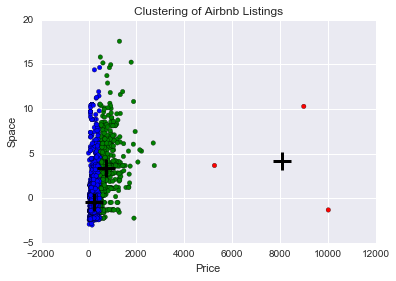

In [46]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
# color in plot is usually specified with c=array
# Hopefully plotting is becoming familiar to you now!

cs = [colors[i] for i in abnb.cluster]
plt.scatter(abnb.price, abnb.space, c=cs)

# cluster centers, marked by "+"
# Just make sure you understand this command: 
plt.scatter(centers.price, centers.space, linewidths=3, marker='+', s=300, c='black')

# TODO - always remember to add labels!
plt.xlabel("Price")
plt.ylabel("Space")
plt.title("Clustering of Airbnb Listings")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ecf2650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x123a2e890>]], dtype=object)

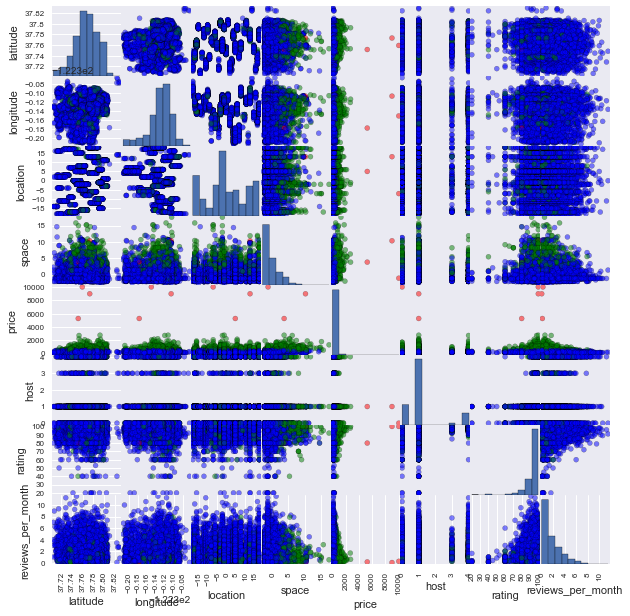

In [47]:
# scatter plot matrix (0=red, 1=green, 2=blue)
# Any observations?
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X, figsize=(10,10), c=cs, s=100)

In [48]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# repeat K-means with 3 clusters on scaled data
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [50]:
# Save the cluster labels and sort by cluster
abnb['scaled_cluster'] = km.labels_
abnb.sort_values(by='scaled_cluster')

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month,cluster,scaled_cluster
0,1162609,37.785217,-122.488655,11.875956,Lovely One Bedroom Apartment This is a big wel...,-1.319244,386.666667,1,89.000000,0.28,2,0
3367,1892718,37.773531,-122.402033,12.875940,E2E Startup House Amazing co-living community ...,0.308052,61.666667,1,100.000000,0.53,2,0
3368,1892712,37.777756,-122.405690,12.875943,E2E Startup House Amazing co-living community ...,0.308052,61.666667,1,97.000000,0.25,2,0
3370,1892691,37.776729,-122.407813,12.875943,E2E Startup House Amazing co-living community ...,0.308052,61.666667,1,96.000000,0.25,2,0
3371,7004223,37.777823,-122.414241,12.875944,Modern SoMa Apartment & Great views Amazing vi...,-1.404158,263.000000,1,100.000000,2.22,2,0
3372,4743196,37.773809,-122.401551,12.875940,Sunny SOMA Loft Set in the heart of Tech Gulch...,-1.256360,240.000000,0,100.000000,0.19,2,0
3373,6279181,37.777320,-122.414911,12.875944,"Cozy private room in SF We have a 2 bed, 2 bat...",-1.404158,111.666667,1,100.000000,0.83,2,0
3374,3924809,37.778326,-122.412324,12.875944,Bright private room in Center SoMa Our authent...,-1.404158,153.333333,1,90.000000,6.73,2,0
3375,2187898,37.777475,-122.396789,12.875942,"Beautiful, Spacious Modern Loft Our modern lof...",0.809456,726.666667,1,93.777344,0.24,1,0
3376,5988248,37.777495,-122.414829,12.875944,7 Looky Home SoMa FREE UBER ride* *FREE UBER $...,1.683233,166.666667,1,100.000000,1.07,2,0


In [51]:
# review the cluster centers
abnb.groupby('scaled_cluster').mean()

,id,latitude,longitude,location,space,price,host,rating,reviews_per_month,cluster
scaled_cluster,,,,,,,,,,
0,4360928,37.784832,-122.418348,5.736350,-0.231268,285.151277,0.762318,92.877680,1.570547,1.882755
1,3234942,37.764243,-122.432877,-1.147557,-0.211568,290.754221,3.900783,97.416449,2.896880,1.878590
2,4076178,37.753860,-122.439902,-4.601974,0.310725,262.400682,0.774735,93.480991,1.810318,1.895217


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1269ab8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12a492450>]], dtype=object)

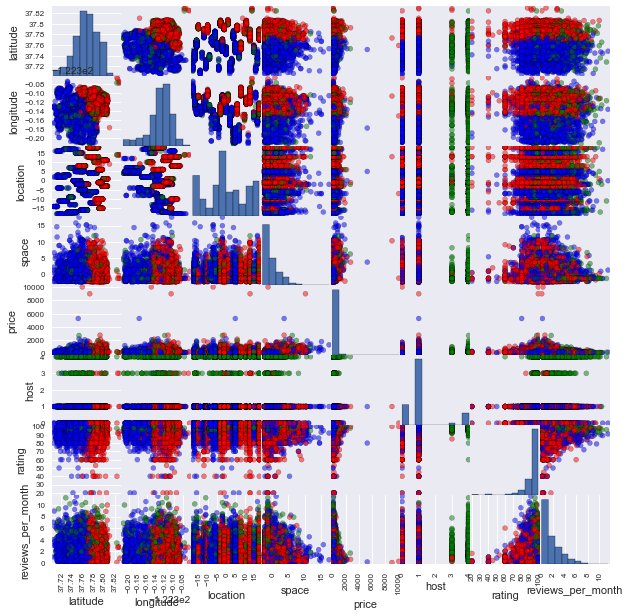

In [52]:
# scatter plot matrix of new cluster assignments (0=red, 1=green, 2=blue)
pd.scatter_matrix(X, c=colors[abnb.scaled_cluster], figsize=(10,10), s=100)

In [53]:
# calculate silhouette_score for our model
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.16646689276147583

In [54]:
# calculate SC for K=2 through K=19
k_range = range(2, 20)
results = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(X_scaled)
    result = metrics.silhouette_score(X_scaled, km.labels_)
    print "k=" + str(k) + ": " + str(result)
    results.append(result)

k=2: 0.230852251196
k=3: 0.16652292249
k=4: 0.172619437044
k=5: 0.18735792551
k=6: 0.190036452702
k=7: 0.192104832374
k=8: 0.191083470917
k=9: 0.17696222193
k=10: 0.175591469892
k=11: 0.163758016859
k=12: 0.168555863742
k=13: 0.171799478748
k=14: 0.166384180461
k=15: 0.169529998039
k=16: 0.170394171305
k=17: 0.17368049237
k=18: 0.170129491639
k=19: 0.175047188766


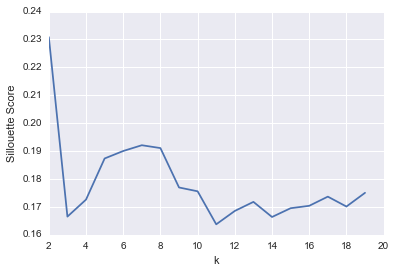

In [55]:
plt.plot(k_range, results)
plt.xlabel("k")
plt.ylabel("Sillouette Score")

In [148]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.5, min_samples=10)
db.fit(X_scaled)

DBSCAN(algorithm='auto', eps=1.5, leaf_size=30, metric='euclidean',
    min_samples=10, p=None, random_state=None)

In [149]:
# review cluster labels
db.labels_

array([ 0,  0, -1, ...,  0, -1,  0])

In [150]:
# save the cluster labels and sort by cluster
abnb['db_cluster'] = db.labels_
abnb.sort_values(by='db_cluster')

,id,latitude,longitude,location,description,space,price,host,rating,reviews_per_month,cluster,scaled_cluster,db_cluster
5252,6643638,37.777411,-122.437878,17.875946,"Off-Site Meeting/Flat, Alamo Sq A historic lan...",8.110169,1123.333333,1,100,1.00,1,0,-1
259,2303080,37.770513,-122.444240,-7.124054,Incredibly Detailed Masterpiece! Incredibly de...,1.135288,999.000000,4,96,4.32,1,1,-1
5396,6345856,37.786563,-122.424153,17.875949,LUX Event Space in Gorgeous Mansion Rent the b...,10.534280,483.333333,1,100,1.00,1,0,-1
4372,4882295,37.736120,-122.411097,-17.124073,Garden View Room with Private Bath Peaceful ga...,-1.404158,150.000000,4,98,10.18,2,1,-1
1590,5163082,37.712133,-122.457938,1.875919,Big 4.5BR/2BA near Public Transit! This family...,11.449733,435.000000,1,82,4.49,2,2,-1
2929,678453,37.720932,-122.390528,-18.124082,Two Room Garden Suite This is a bright new mod...,1.907295,276.666667,0,84,1.22,2,2,-1
2466,5144482,37.744579,-122.462843,16.875933,Gorgeous & stylish unit w/parking This awesome...,-0.860326,207.333333,4,100,7.73,2,1,-1
4366,2011311,37.748126,-122.411130,-17.124067,STUNNING Mission Oasis by 24th BART Gorgeous g...,-0.484353,173.666667,1,64,0.33,2,2,-1
2459,535293,37.724706,-122.456918,16.875923,Amazing 3BR/3BA Radiant Heated Apt Take advant...,4.174508,540.000000,0,86,0.46,1,2,-1
2924,3469495,37.731047,-122.388013,-18.124078,"Minimalist Modern Quiet Garden Flat Light, bri...",2.853242,166.333333,4,95,6.18,2,1,-1


In [151]:
# review cluster centers
abnb.groupby('db_cluster').mean()

,id,latitude,longitude,location,space,price,host,rating,reviews_per_month,cluster,scaled_cluster
db_cluster,,,,,,,,,,,
-1,4909883,37.762598,-122.435586,1.947102,3.954901,712.718851,1.520599,84.942986,2.547903,1.501873,1.116105
0,4167421,37.767982,-122.430332,-0.164023,-0.113677,252.085629,0.764881,93.716525,1.687332,1.907526,1.106718
1,3137498,37.764842,-122.431697,-1.333098,-0.466195,265.057533,3.899718,97.532486,2.794449,1.903955,0.994350
2,3663201,37.715263,-122.403852,15.875913,-0.504628,150.962963,0.888889,93.222222,1.341111,1.944444,2.000000


In [152]:
abnb.groupby('db_cluster').count()['id']

db_cluster
-1     267
 0    4704
 1     708
 2      18
Name: id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1497697d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14de78b10>]], dtype=object)

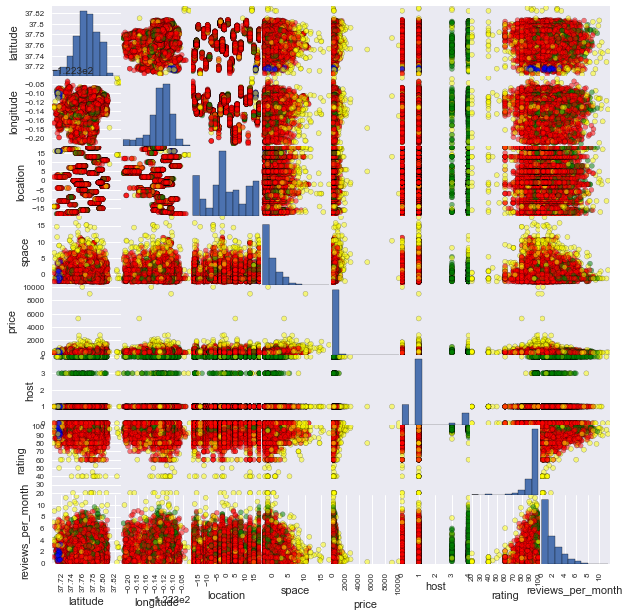

In [153]:
# scatter plot matrix of DBSCAN cluster assignments (0=red, 1=green, 2=blue, -1=yellow)
pd.scatter_matrix(X, c=colors[abnb.db_cluster], figsize=(10,10), s=100)